LEVEL 3 TASK 1

In [40]:
pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr

In [42]:
data = pd.read_csv('Dataset.csv')

In [43]:
data['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [44]:
data.drop(index= data.loc[data['Rating text'] == 'Not rated' ,:].index.tolist() , inplace= True)

In [45]:
data['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Poor'], dtype=object)

TASK - 1

In [46]:
print('Most Common Positive Keyword: --', 
      data.drop(index=data.loc[data['Rating text'] == 'Not rated'].index.tolist()).loc[data
      ['Aggregate rating'] > 4, 'Rating text'].value_counts().head(1))
print('Most Common Negative Keyword: --',
      data.drop(index=data.loc[data['Rating text'] == 'Not rated'].index.tolist()).loc[data
      ['Aggregate rating'] > 2.5, 'Rating text'].value_counts().head(1))


Most Common Positive Keyword: -- Rating text
Very Good    813
Name: count, dtype: int64
Most Common Negative Keyword: -- Rating text
Average    3627
Name: count, dtype: int64


In [47]:
def rat_len(x):
    return len(x)
data['Rating_length'] = data['Rating text'].apply(rat_len)
print('The average length of the rating text is :--',round(data['Rating_length'].mean(),2))

The average length of the rating text is :-- 6.45


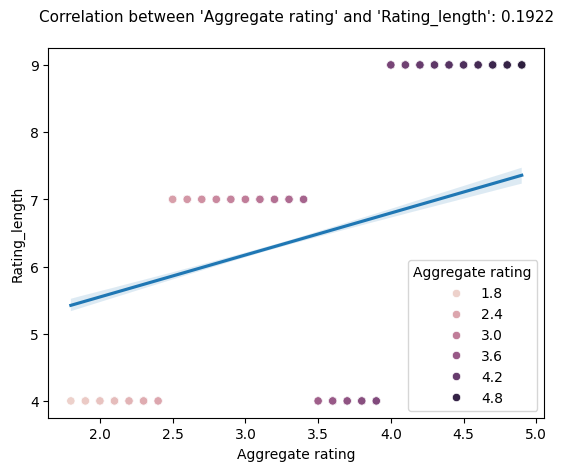

In [53]:
correlation, _ = pearsonr(data['Aggregate rating'],data['Rating_length'])
correlation = round(correlation, 5)

sns.scatterplot(data=data, y = 'Rating_length' , hue = 'Aggregate rating' , x= 'Aggregate rating')
sns.regplot(data=data, x= 'Aggregate rating', y= 'Rating_length', scatter=False)

plt.title(f"Correlation between 'Aggregate rating' and 'Rating_length': {correlation}\n", fontdict=dict(size = 11))
plt.show()

The correlation shows a negligible positive correlation (0.192) between length of the rating and aggregate rating.

TASK 2

In [54]:
print('Restaurant with the highest number of votes :--' , 
      data.loc[data['Votes'] == data['Votes'].max() , 'Restaurant Name'].tolist()[-1])

print('Restaurant with the lowest number of votes :--' , 
      data.loc[data['Votes'] == data['Votes'].min() , 'Restaurant Name'].tolist()[-1])

Restaurant with the highest number of votes :-- Toit
Restaurant with the lowest number of votes :-- Chinese Chilli Seasonal


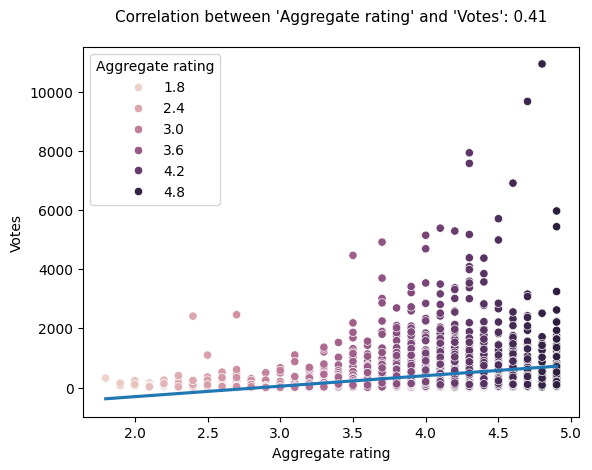

In [55]:
correlation, _ = pearsonr(data['Aggregate rating'],data['Votes'])
correlation = round(correlation, 2)

sns.scatterplot(data=data, y = 'Votes' , hue = 'Aggregate rating' , x= 'Aggregate rating')
sns.regplot(data=data, x= 'Aggregate rating', y= 'Votes', scatter=False)

plt.title(f"Correlation between 'Aggregate rating' and 'Votes': {correlation}\n", fontdict=dict(size = 11))
plt.show()

 The correlation shows a moderate positive correlation (0.41) between number of Votes and Aggregate Rating.

TASK 3

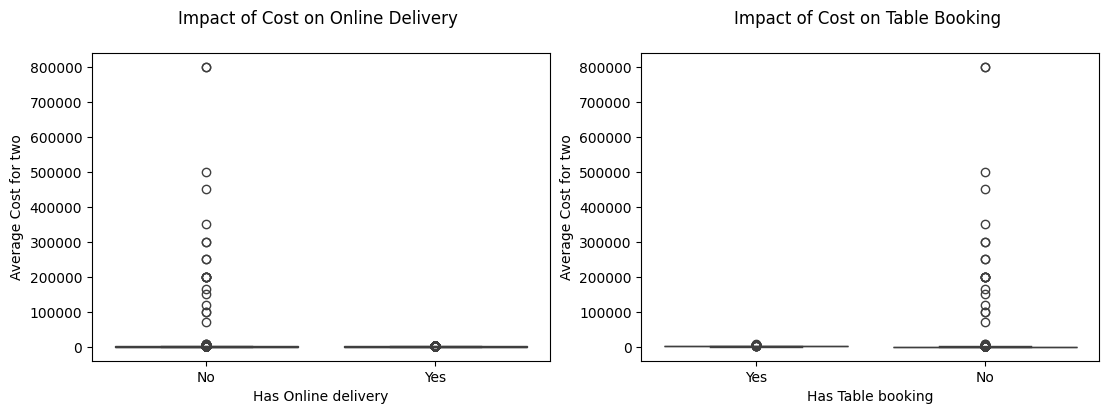

In [56]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.boxplot(x= 'Has Online delivery' , y= 'Average Cost for two' , data=data)
plt.xlabel('Has Online delivery')
plt.ylabel('Average Cost for two')
plt.title('Impact of Cost on Online Delivery \n')

plt.subplot(1,2,2)

sns.boxplot(x= 'Has Table booking' , y= 'Average Cost for two' , data=data)
plt.xlabel('Has Table booking')
plt.ylabel('Average Cost for two')
plt.title('Impact of Cost on Table Booking \n')

plt.show()


Online Delivery and Table Booking both option show a negative relationship with cost.

High priced Restaurants which have average cost more than 10000 did not provide Online delivery as well as Table Booking option. 

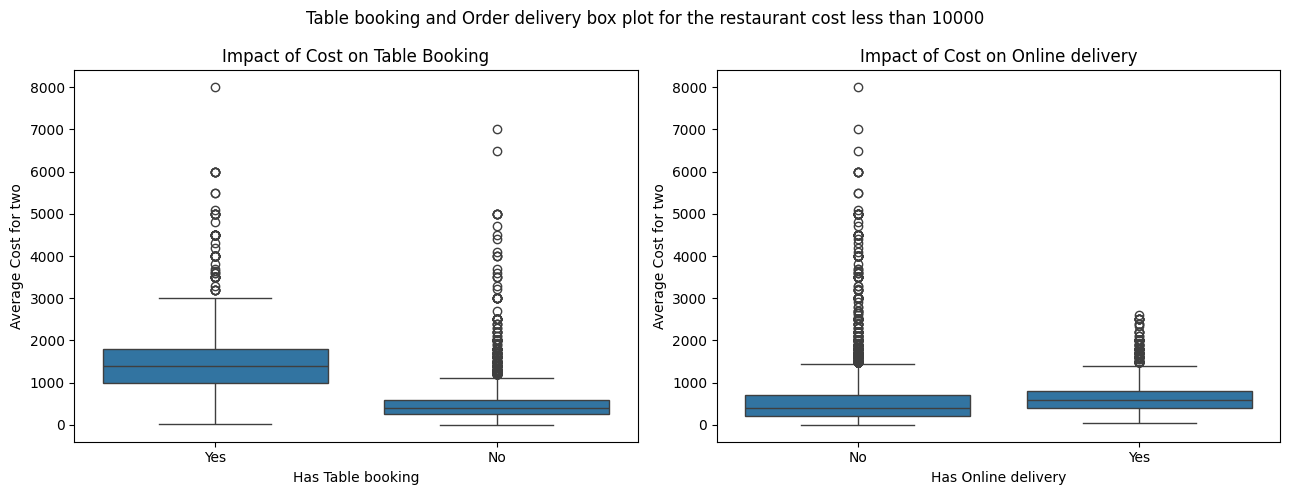

In [58]:
plt.figure(figsize= (13,5))
plt.suptitle('Table booking and Order delivery box plot for the restaurant cost less than 10000')
plt.subplot(1,2,1)

sns.boxplot(x= 'Has Table booking' , y= 'Average Cost for two' ,data=data.loc[data['Average Cost for two']<10000 , :] )
plt.title('Impact of Cost on Table Booking')

plt.subplot(1,2,2)
sns.boxplot(x= 'Has Online delivery' , y= 'Average Cost for two' ,data=data.loc[data['Average Cost for two']<10000 , :] )
plt.title('Impact of Cost on Online delivery')

plt.tight_layout()
plt.show()


The option for table booking is predominantly available in restaurant with an average cost ranging from 1000 to 2000.

The option for online delivery is predominantly available in restaurant with an average cost ranging less than 1000.
